In [1]:
import pandas as pd
import configparser
import numpy as np
from datetime import datetime
import dateutil.relativedelta
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing

from scipy import stats
# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', None) # to display all the columns

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

import platform
from platform import python_version
import jupyterlab
print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)

seaborn version	: 0.9.0
System
os name: nt
system: Windows
release: 10

Python
version: 3.7.4

Python Packages
jupterlab==1.1.4
pandas==1.1.4
numpy==1.16.5


In [3]:
Customer_Attr= pd.read_excel('D:\Collections\Adhoc\FCE_2W_List.xlsx')
Customer_Attr.shape

(354, 67)

In [4]:
Customer_Attr['Receipt Band'].value_counts()


A : < 2     306
B: 2 - 4     45
C: 4 - 6      3
Name: Receipt Band, dtype: int64

In [6]:
Customer_Attr['Vist Band'].value_counts()

A : < 2        227
B: 2 - 4        58
C: 4 - 8        50
D : 8 - 12      17
E : 12 - 16      2
Name: Vist Band, dtype: int64

In [7]:
Customer_Attr['Resignation Month'].value_counts()


2020-07-01    84
2020-06-01    82
2020-08-01    71
2020-05-01    45
2020-03-01    44
2020-04-01    20
2020-02-01     3
2019-12-01     2
2019-10-01     1
2019-03-01     1
1900-01-01     1
Name: Resignation Month, dtype: int64

In [27]:
Customer_Attr.shape
Customer_Attr.head()

(354, 71)

,Employee Id,Employee Name,Date of Joining,Last working Date,Date of Resignation,Effective From,Ageing,Vintage,Left Month,Resignation Month,Productivity Definition,Product,Department,Function,Region,P&L Area,Location,Designation,Reporting Manager ID,Reporting Manager Name,TCM Vintage,HR Deck Grouping 2,Prev. Experience,Exit Reason - 1,Exit Category,Final Reason,Final Reason Sub Category,CAP/Guru,CTC Band Final,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,Visit Jan,Vist Feb,Vist Mar,Visit Apr,Visit May,Visit Jun,Visit Jul,Receipt Jan,Receipt Feb,Receipt Mar,Receipt Apr,Receipt May,Receipt Jun,Receipt Jul,May Winner,Jun Winner,July Winner,Last 3 Months Avg Incentive,Incentive Band,Per day Visit,Vist Band,Per Day Receipt,Receipt Band,Outlier,Current,Permanent,Resident_Category,contest_win,contest_win_catg,Final Reason_catg,Vintage_catg
0,5003598,Karthiswaran N,2012-10-05,2020-04-04,2020-03-06 12:31:00,2017-04-01,91.2667,A : >48 Months,2020-04-01,2020-03-01,T,Two Wheeler,Collections,Collections,TN II,Madurai,Madurai,Field Collection Executive,5002342,Jayabalan S,A : 6 yrs,FCE - 2W,0.0000,Personal,Undesired,Better_Prospects,Own Business,Non Guru,C : 7000 to 9000,588.0000,2366.0000,6404.2000,4618.4300,5508.1396,2198.2000,2222.0636,0.0000,0.0000,0.0000,0.0000,1.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,57.0000,56.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,4108.2565,A : < 10000,0.0577,A : < 2,1.2308,A : < 2,No Outlier,Ramanathapuram,Ramanathapuram,Own,0,No_win,Employe_Reason,C: >18 months
1,5003653,Selvandran G,2012-10-15,2020-04-09,2020-03-11 21:41:00,2017-04-01,91.1000,A : >48 Months,2020-04-01,2020-03-01,T,Two Wheeler,Collections,Collections,TN II,Pondicherry,Pondicherry,Field Collection Executive,5014363,Asokan K,B : 4 to 6 yrs,FCE - 2W,0.0000,Health Reason,Undesired,Health_Reasons,Employee Health,Non Guru,C : 7000 to 9000,9275.5340,16565.6543,20809.9200,17242.8000,20157.3140,15459.9200,2482.9867,1111.5208,0.0000,0.0000,0.0000,48.0000,56.0000,42.0000,0.0000,0.0000,0.0000,0.0000,89.0000,83.0000,20.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,17620.0113,B: 10000 - 20000,1.8846,A : < 2,1.9808,A : < 2,No Outlier,Vellore,Vellore,Own,0,No_win,Employe_Reason,C: >18 months
2,5004074,Prabhu C,2012-12-06,2020-04-04,2020-03-06 13:22:00,2018-11-01,89.2000,A : >48 Months,2020-04-01,2020-03-01,S,Two Wheeler,Collections,Collections,TN II,Kumbakonam,Thanjavur,Senior Field Collection Executive,5023914,Manikandan U,D : 2 to 3 yrs,FCE - 2W,6.4000,Job Opportunity in Foreign Country,Undesired,Better_Prospects,Going Abroad,Non Guru,C : 7000 to 9000,3277.0000,17703.7726,16713.2000,10557.7000,9254.1635,19964.7500,26551.6210,316.4501,0.0000,0.0000,0.0000,64.0000,95.0000,80.0000,0.0000,0.0000,0.0000,0.0000,91.0000,91.0000,15.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,13258.8712,B: 10000 - 20000,3.3654,B: 2 - 4,2.0385,B: 2 - 4,+Outlier,Thanjavur,Thanjavur,Own,0,No_win,Employe_Reason,C: >18 months
3,5004660,Naveen Bangwai,2013-01-01,2020-04-01,2020-03-03 10:14:00,2018-04-01,88.2333,A : >48 Months,2020-04-01,2020-03-01,A,Two Wheeler,Collections,Collections,North,Haryana,Karnal,Field Collection Executive,5004323,Vineet Kumar,A : 6 yrs,FCE - 2W,0.0000,Personal,Undesired,Better_Prospects,NaN,Guru,C : 7000 to 9000,650.0000,5107.0016,726.6000,3953.6400,5675.1132,783.3800,56.2500,0.0000,0.0000,0.0000,0.0000,17.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,33.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,3470.7111,A : < 10000,0.0000,A : < 2,0.0385,A : < 2,No Outlier,Ambala,Ambala,Own,0,No_win,Employe_Reason,C: >18 months
4,5005035,Saravanakumar M,2013-02-01,2020-04-04,2020-03-06 12:59:00,2017-04-01,87.3000,A : >48 Months,2020-04-01,2020-03-01,A,Two Wheeler,Collections,Collections,TN II,Madurai,Madurai,Field Collection Executive,5002342,Jayabalan S,A : 6 yrs,FCE - 2W,0.0000,Personal,Undesi

In [8]:
Customer_Attr['Final Reason'].value_counts(dropna=False)

Better_Prospects           102
Non_Performance             91
Health_Reasons              50
Family_Reasons              37
Left_Without_Intimation     37
Integrity Issue             24
Organisation_Reason          8
Higher_Studies               2
Demise                       1
Behavioural_Issues           1
Retirement                   1
Name: Final Reason, dtype: int64

In [9]:
Customer_Attr['contest_win']=Customer_Attr['May Winner']+Customer_Attr['Jun Winner']+Customer_Attr['July Winner']
Customer_Attr['contest_win'].describe()

count   354.0000
mean      1.3277
std       2.9538
min       0.0000
25%       0.0000
50%       0.0000
75%       1.0000
max      24.0000
Name: contest_win, dtype: float64

In [10]:
Customer_Attr['contest_win_catg']=np.where(Customer_Attr['contest_win']<1,'No_win','>=1')

In [11]:
Customer_Attr['Final Reason'].value_counts(dropna=False)

Better_Prospects           102
Non_Performance             91
Health_Reasons              50
Family_Reasons              37
Left_Without_Intimation     37
Integrity Issue             24
Organisation_Reason          8
Higher_Studies               2
Demise                       1
Behavioural_Issues           1
Retirement                   1
Name: Final Reason, dtype: int64

In [12]:
Reason_map={'Better_Prospects':'Employe_Reason','Health_Reasons':'Employe_Reason','Family_Reasons':'Employe_Reason','Higher_Studies':'Employe_Reason',\
     'Retirement':'Employe_Reason' , 'Demise':'Employe_Reason',\
    'Non_Performance':'Productivity_Reason','Organisation_Reason':'Productivity_Reason',
   'Left_Without_Intimation':'Behavioural_Reason','Integrity Issue':'Behavioural_Reason','Behavioural_Issues':'Behavioural_Reason'   
           }
Customer_Attr['Final Reason_catg']=Customer_Attr['Final Reason'].replace(Reason_map)


In [13]:
Customer_Attr['Final Reason_catg'].value_counts(dropna=False)

Employe_Reason         193
Productivity_Reason     99
Behavioural_Reason      62
Name: Final Reason_catg, dtype: int64

In [14]:
Customer_Attr['Vintage'].value_counts(dropna=False)

I : <3 Months          62
G : 6 to 9 Months      54
A : >48 Months         46
H : 3 to 6 months      45
E : 12 to 18 Months    41
C : 24 to 36 Months    36
F : 9 to 12 months     32
D : 18 to 24 Months    23
B : 36 to 48 Months    15
Name: Vintage, dtype: int64

In [15]:
vintage_map={'I : <3 Months':'A: <6 months','H : 3 to 6 months':'A: <6 months',\
            'G : 6 to 9 Months':'B: 6 to 18 months','F : 9 to 12 months':'B: 6 to 18 months','E : 12 to 18 Months': 'B: 6 to 18 months',\
    'D : 18 to 24 Months':'C: >18 months','C : 24 to 36 Months':'C: >18 months','B : 36 to 48 Months':'C: >18 months',\
             'A : >48 Months':'C: >18 months'          }

Customer_Attr['Vintage_catg']=Customer_Attr['Vintage'].replace(vintage_map)

In [16]:
Customer_Attr['Vintage_catg'].value_counts(dropna=False)

B: 6 to 18 months    127
C: >18 months        120
A: <6 months         107
Name: Vintage_catg, dtype: int64

In [17]:
#Customer_Attr.columns
used_cols=['Vintage_catg','Productivity Definition','contest_win_catg']
x=Customer_Attr[used_cols]

x.isnull().sum()

Vintage_catg               0
Productivity Definition    0
contest_win_catg           0
dtype: int64

In [20]:
#!pip install kmodes
from kmodes.kmodes import KModes

In [23]:
cost = []
for num_clusters in list(range(1,15)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 16, verbose=1)
    kmode.fit_predict(x)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves:

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 417.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 45, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 66, cost: 447.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 446.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6, cost: 447.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 10, cost: 451.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 34, cost: 428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, m

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 54, cost: 353.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 43, cost: 347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 56, cost: 347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 416.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 33, cost: 387.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, mo

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 43, cost: 250.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 50, cost: 266.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 68, cost: 299.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 23, cost: 331.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 25, cost: 318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 74, cost: 275.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 38, cost: 250.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100,

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1,
       3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 0, 0, 3, 1, 3, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 99, cost: 222.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 34, cost: 241.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 50, cost: 242.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 38, cost: 235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 222.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 81, cost: 244.0
Run 6, iteration: 2/100, moves: 0, cost: 244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 69, cost: 289.0
Init: initializing centroids
Init: initializing clusters
S

array([3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 3, 4, 3, 4, 1, 1, 4, 1, 4, 3, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 4, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 3, 2, 1, 2, 2, 1, 2, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2,
       4, 1, 4, 4, 1, 4, 1, 4, 3, 4, 4, 1, 1, 4, 1, 4, 3, 1, 4, 3, 1, 1,
       4, 1, 1, 3, 3, 1, 4, 1, 4, 4, 4, 4, 0, 0, 4, 1, 4, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 1, 1, 1, 3, 1, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 1, 2, 2, 3, 2, 1,
       2, 2, 3, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 3, 3, 2,
       1, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 39, cost: 225.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17, cost: 186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 39, cost: 190.0
Run 3, iteration: 2/100, moves: 74, cost: 190.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 40, cost: 236.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 45, cost: 186.0
Run 5, iteration: 2/100, moves: 0, cost: 186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 40, cost: 240.0
Run 6, iteration: 2/100, moves: 8, cost: 240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, ite

array([1, 1, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 1, 4, 0, 4, 4, 0, 1, 4, 4, 0,
       0, 4, 1, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 2, 2, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 4, 1, 4, 0, 4, 0, 4, 0, 0, 4,
       0, 3, 0, 0, 0, 0, 2, 2, 2, 5, 5, 5, 1, 4, 1, 4, 0, 1, 4, 1, 1, 1,
       0, 0, 4, 4, 0, 4, 4, 0, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 4, 1, 4,
       3, 1, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 2, 3, 0, 3, 0, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 5, 5, 2, 0, 2, 2, 5, 2, 5, 2, 2, 5, 5, 2,
       3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 1,
       0, 1, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 1, 3, 0, 3, 3, 3,
       0, 0, 3, 3, 0, 0, 3, 1, 0, 3, 2, 2, 2, 2, 0, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 1, 4, 1, 1, 4, 1, 4, 1, 1, 0, 4, 1, 4, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 0, 0, 0, 3, 3, 0, 3, 3, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 50, cost: 223.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 17, cost: 160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9, cost: 195.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 18, cost: 170.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 37, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, mo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 2, 2, 4, 2, 2, 1, 1, 1, 3, 3, 3, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       2, 6, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 1, 1, 2, 4, 2, 1, 1, 6, 1, 1,
       1, 6, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1,
       2, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 5, 0, 5,
       0, 0, 2, 2, 2, 4, 6, 6, 2, 2, 2, 4, 6, 6, 2, 4, 6, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 6, 2, 6, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 5, 0, 5, 5, 0, 5, 0, 0, 5, 0, 0, 5, 0, 5, 5, 0,
       5, 5, 0, 5, 5, 5, 5, 0, 0, 5, 5, 0, 6, 2, 6, 6, 2, 2, 6, 2, 2, 6,
       6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 2, 6,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 63, cost: 188.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6, cost: 168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5, cost: 206.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 21, cost: 155.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 16, cost: 152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 228.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 50, cost: 204.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, mo

array([3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 2, 2, 7, 2, 2, 7, 2, 7, 2, 7, 7, 2, 7, 6, 6, 6, 6, 6, 6,
       6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 7, 2, 2, 2, 2, 1, 6, 6, 1, 1, 1, 3, 0, 4, 0, 0, 4, 0, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0,
       7, 4, 7, 7, 2, 7, 2, 7, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 7, 2, 2, 2,
       7, 4, 2, 2, 2, 2, 7, 2, 7, 7, 7, 7, 1, 6, 7, 2, 7, 1, 6, 4, 5, 6,
       6, 4, 6, 6, 6, 6, 1, 6, 1, 1, 5, 1, 6, 6, 1, 6, 1, 6, 6, 1, 1, 6,
       7, 0, 0, 0, 3, 4, 0, 0, 0, 0, 4, 4, 3, 0, 0, 0, 4, 0, 0, 3, 0, 0,
       0, 0, 2, 4, 4, 2, 4, 4, 7, 7, 4, 2, 4, 4, 4, 2, 4, 4, 2, 7, 7, 7,
       2, 2, 7, 7, 2, 4, 4, 4, 4, 4, 5, 6, 5, 6, 1, 6, 6, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 4, 0, 3, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 3, 3, 0,
       4, 0, 0, 3, 3, 3, 4, 0, 0, 3, 0, 0, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 31, cost: 154.0
Run 2, iteration: 2/100, moves: 8, cost: 154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 26, cost: 125.0
Run 3, iteration: 2/100, moves: 7, cost: 123.0
Run 3, iteration: 3/100, moves: 1, cost: 123.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 33, cost: 170.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 63, cost: 140.0
Run 6, iteration: 2/100, moves: 6, cost: 140.0
Init: initializing centroids
Init: initializin

array([2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 5, 2, 2, 2, 5, 5, 2,
       2, 2, 2, 3, 3, 3, 7, 7, 3, 7, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 5, 2, 5, 2, 5, 2, 2, 5,
       7, 3, 3, 7, 3, 3, 1, 4, 4, 1, 1, 1, 2, 2, 8, 5, 2, 8, 5, 2, 2, 6,
       2, 2, 5, 5, 2, 5, 2, 2, 2, 2, 8, 2, 5, 5, 2, 6, 2, 5, 5, 5, 2, 5,
       3, 0, 3, 3, 7, 3, 7, 3, 3, 3, 3, 7, 7, 3, 7, 3, 3, 7, 3, 3, 7, 7,
       3, 0, 7, 3, 3, 7, 3, 7, 3, 3, 3, 3, 1, 4, 3, 7, 3, 1, 4, 0, 6, 4,
       4, 0, 4, 4, 4, 4, 1, 4, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4,
       3, 6, 6, 6, 6, 8, 5, 5, 2, 5, 8, 8, 2, 5, 6, 5, 8, 5, 5, 6, 5, 6,
       2, 5, 3, 0, 0, 7, 0, 0, 3, 3, 0, 7, 0, 0, 0, 7, 0, 0, 7, 3, 3, 3,
       7, 7, 3, 3, 7, 0, 0, 0, 0, 0, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 6, 8, 5, 6, 6, 5, 8, 5, 5, 8, 2, 2, 6, 5, 6, 6, 5,
       8, 6, 2, 6, 6, 6, 8, 5, 5, 6, 6, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38, cost: 149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12, cost: 129.0
Run 2, iteration: 2/100, moves: 0, cost: 129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12, cost: 112.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 35, cost: 133.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 43, cost: 105.0
Run 6, iteration: 2/100, moves: 6, cost: 105.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 50, cost: 149.0
Init: initi

array([0, 0, 6, 5, 5, 5, 5, 7, 5, 5, 0, 5, 0, 7, 5, 7, 6, 5, 0, 7, 7, 5,
       5, 6, 0, 3, 0, 3, 8, 8, 3, 8, 3, 0, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9,
       9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 6, 0, 7, 5, 7, 5, 7, 5, 5, 7,
       8, 3, 0, 8, 0, 0, 1, 9, 9, 1, 1, 1, 0, 6, 2, 7, 5, 2, 7, 0, 0, 0,
       5, 5, 7, 7, 5, 7, 6, 5, 0, 0, 2, 0, 7, 7, 0, 0, 0, 7, 7, 7, 0, 7,
       3, 2, 3, 3, 8, 3, 8, 3, 0, 3, 3, 8, 8, 3, 8, 3, 0, 8, 3, 0, 8, 8,
       3, 2, 8, 0, 0, 8, 3, 8, 3, 3, 3, 3, 1, 9, 3, 8, 3, 1, 9, 2, 0, 9,
       9, 2, 9, 9, 9, 9, 1, 9, 1, 1, 9, 1, 9, 9, 1, 9, 1, 9, 9, 1, 1, 9,
       3, 4, 4, 4, 0, 2, 4, 7, 6, 7, 2, 2, 0, 7, 4, 7, 2, 7, 4, 0, 7, 4,
       5, 4, 0, 2, 2, 8, 2, 2, 3, 3, 2, 8, 2, 2, 2, 8, 2, 2, 8, 3, 3, 3,
       8, 8, 3, 3, 8, 2, 2, 2, 2, 2, 9, 9, 9, 9, 1, 9, 9, 9, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 2, 7, 0, 4, 7, 2, 7, 4, 2, 5, 6, 4, 7, 0, 0, 4,
       2, 4, 5, 0, 0, 0, 2, 4, 7, 0, 4, 6, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 98.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 46, cost: 97.0
Run 2, iteration: 2/100, moves: 15, cost: 97.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 27, cost: 125.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 23, cost: 102.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 16, cost: 129.0
Run 5, iteration: 2/100, moves: 0, cost: 129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 10, cost: 152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 28, cost: 116.0
Init: initia

array([ 1,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,  1,  1,  5,  1,  5,  1,
        1,  1,  5,  5,  1,  1,  1,  1,  4,  4,  9, 10, 10,  9, 10,  9,  4,
        9,  9,  4,  9,  2,  2,  2,  2,  2,  2,  2,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  1,  1,  1,  5,  1,  5,  1,  5,  1,  1,  5, 10,  9,
        4, 10,  4,  4,  2,  2,  2,  6,  6,  6,  1,  1,  8,  5,  1,  8,  5,
        1,  1,  1,  1,  1,  5,  5,  1,  5,  1,  1,  1,  1,  8,  1,  5,  5,
        1,  1,  1,  5,  5,  5,  1,  5,  9,  0,  9,  9, 10,  9, 10,  9,  4,
        4,  9, 10, 10,  4, 10,  9,  4, 10,  9,  4, 10, 10,  9,  0, 10,  4,
        4, 10,  9, 10,  9,  9,  9,  9,  2,  2,  9, 10,  9,  2,  2,  7,  0,
        2,  2,  7,  2,  2,  2,  2,  2,  2,  6,  6,  0,  2,  2,  2,  6,  2,
        6,  2,  2,  6,  6,  2,  9,  3,  3,  3,  1,  8,  0,  5,  1,  5,  8,
        8,  1,  5,  3,  5,  8,  5,  0,  1,  5,  3,  1,  0,  4,  0,  0, 10,
        0,  7,  9,  9,  0, 10,  7,  0,  0, 10,  0,  0, 10,  9,  9,  9, 10,
       10,  9,  9, 10,  7

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19, cost: 104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 91.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 44, cost: 114.0
Run 3, iteration: 2/100, moves: 19, cost: 114.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 125.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 101.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 48, cost: 110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 21, cost: 120.0
Run 7, iteration: 2/100, moves: 20, cost: 120.0
Init: initia

array([ 5,  5,  6,  7,  7,  7,  7,  8,  7,  7,  5,  7,  5,  8,  7,  8,  6,
        7,  5,  8,  8,  7,  7,  6,  5,  9,  0,  0, 10, 10,  0, 10,  0,  0,
        0,  0,  9,  0, 11, 11, 11, 11, 11, 11, 11,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  7,  6,  5,  8,  7,  8,  7,  8,  7,  7,  8, 10,  0,
        0, 10,  0,  0,  1, 11, 11,  1,  1,  1,  5,  6,  3,  8,  7,  3,  8,
        5,  5,  3,  7,  7,  8,  8,  7,  8,  6,  7,  5,  5,  3,  5,  8,  8,
        5,  3,  5,  8,  8,  8,  5,  8,  0,  2,  0,  0, 10,  0, 10,  0,  0,
        9,  0, 10, 10,  9, 10,  0,  0, 10,  0,  0, 10, 10,  0,  2, 10,  0,
        0, 10,  0, 10,  0,  0,  0,  0,  1, 11,  0, 10,  0,  1, 11,  2,  4,
       11, 11,  2, 11, 11, 11, 11,  1, 11,  1,  1,  2,  1, 11, 11,  1, 11,
        1, 11, 11,  1,  1, 11,  0,  3,  3,  3,  3,  3,  2,  8,  6,  8,  3,
        3,  5,  8,  3,  8,  3,  8,  2,  3,  8,  3,  7,  2,  0,  2,  2, 10,
        2,  2,  0,  0,  2, 10,  2,  2,  2, 10,  2,  2, 10,  0,  0,  0, 10,
       10,  0,  0, 10,  2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5, cost: 82.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 32, cost: 95.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 23, cost: 104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 71, cost: 93.0
Run 6, iteration: 2/100, moves: 11, cost: 93.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 21, cost: 84.0
Init: initializing centroids
Init: initializing clusters
Startin

array([11, 11,  0, 12, 12, 12, 12,  6, 12, 12, 11, 12, 11,  6, 12,  6,  0,
       12, 11,  6,  6, 12, 12,  0, 11,  2,  3,  8, 10, 10,  8, 10,  8,  3,
        8,  8,  2,  8,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5, 12,  0, 11,  6, 12,  6, 12,  6, 12, 12,  6, 10,  8,
        3, 10,  3,  3,  4,  4,  4,  5,  5,  5, 11,  0,  0,  6, 12,  0,  6,
       11, 11,  1, 12, 12,  6,  6, 12,  6,  0, 12, 11, 11,  0, 11,  6,  6,
       11,  1, 11,  6,  6,  6, 11,  6,  8,  1,  8,  8, 10,  8, 10,  8,  3,
        2,  8, 10, 10,  2, 10,  8,  3, 10,  8,  3, 10, 10,  8,  7, 10,  3,
        3, 10,  8, 10,  8,  8,  8,  8,  4,  4,  8, 10,  8,  4,  4,  9,  1,
        4,  4,  9,  4,  4,  4,  4,  4,  4,  5,  5,  4,  4,  4,  4,  5,  4,
        5,  4,  4,  5,  5,  4,  8,  0,  0,  0,  1,  0,  0,  6,  0,  6,  0,
        0, 11,  6,  0,  6,  0,  6,  0,  1,  6,  0, 12,  0,  3,  7,  7, 10,
        2,  9,  8,  8,  7, 10,  9,  2,  7, 10,  1,  7, 10,  8,  8,  8, 10,
       10,  8,  8, 10,  9

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 68.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16, cost: 126.0
Run 2, iteration: 2/100, moves: 19, cost: 125.0
Run 2, iteration: 3/100, moves: 0, cost: 125.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 36, cost: 64.0
Run 3, iteration: 2/100, moves: 16, cost: 64.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 70.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 58, cost: 82.0
Run 5, iteration: 2/100, moves: 33, cost: 82.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 54, cost: 89.0
Run 6, iteration: 2/100, moves: 1, cost: 89.0
Init

array([ 1,  1,  1, 12, 12, 12, 12,  5, 12, 12,  1, 12,  1,  5, 12,  5,  1,
       12,  1,  5,  5, 12, 12,  1,  1,  0,  3,  9,  0,  0,  9,  0,  9,  3,
        9,  9,  0,  9,  8,  8,  8,  8,  8,  8,  8, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 12,  1,  1,  5, 12,  5, 12,  5, 12, 12,  5,  0,  9,
        3,  0,  3,  3,  7,  8,  8, 11, 11, 11,  1,  1,  6,  5, 12,  6,  5,
        1,  1,  1, 12, 12,  5,  5, 12,  5,  1, 12,  1,  1,  6,  1,  5,  5,
        1,  1,  1,  5,  5,  5,  1,  5,  9,  2,  9,  9,  0,  9,  0,  9,  3,
        0,  9,  0,  0,  0,  0,  9,  3,  0,  9,  3,  0,  0,  9, 13,  0,  3,
        3,  0,  9,  0,  9,  9,  9,  9,  7,  8,  9,  0,  9,  7,  8,  6,  4,
        8,  8,  6,  8,  8,  8,  8,  7,  8, 11, 11,  4,  7,  8,  8, 11,  8,
       11,  8,  8, 11, 11,  8,  9,  2,  2,  2,  1,  6,  4,  5,  1,  5,  6,
        6,  1,  5,  2,  5,  6,  5,  4,  1,  5,  2, 12,  4,  3, 13, 13,  0,
        2,  6,  9,  9, 13,  0,  6,  2, 13,  0,  2, 13,  0,  9,  9,  9,  0,
        0,  9,  9,  0,  6

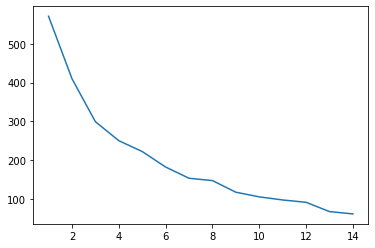

In [24]:
y = np.array([i for i in range(1,15,1)])
plt.plot(y,cost)

In [21]:
# define the k-modes model
km = KModes(n_clusters=4, init='Huang', n_init=16, verbose=1,random_state=43)
# fit the clusters to the skills dataframe
clusters = km.fit_predict(x)
# get an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 41, cost: 282.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 89, cost: 339.0
Run 2, iteration: 2/100, moves: 33, cost: 339.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 24, cost: 333.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 48, cost: 272.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 88, cost: 298.0
Run 5, iteration: 2/100, moves: 14, cost: 298.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 96, cost: 292.0
Run 6, iteration: 2/100, moves: 0, cost: 292.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, it

In [22]:
### Mode of the Clusters 
clusterCentroidsDf = pd.DataFrame(km.cluster_centroids_)
clusterCentroidsDf.columns = x.columns
clusterCentroidsDf

,Vintage_catg,Productivity Definition,contest_win_catg
0,A: <6 months,Infant,No_win
1,B: 6 to 18 months,A,No_win
2,C: >18 months,R,>=1
3,C: >18 months,R,No_win


In [23]:
x['cluster']=clusters+1

<AxesSubplot:xlabel='cluster'>

Text(0.5, 0, 'Bins')

Text(0, 0.5, 'Quantity')

Text(0.5, 1.0, 'Normalized Stacked Bar Chart: Cluster vs Vintage')

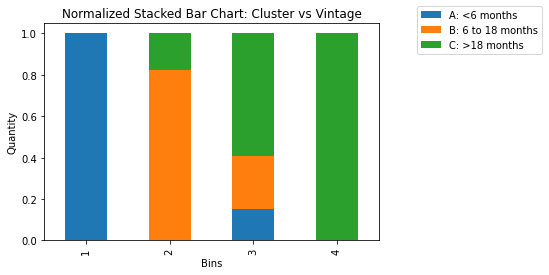

In [25]:
chart=pd.crosstab(x.cluster,x.Vintage_catg)
#normalizing chart and plotting chart
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantity')
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
plt.title('Normalized Stacked Bar Chart: Cluster vs Vintage')

<AxesSubplot:xlabel='cluster'>

Text(0.5, 0, 'Bins')

Text(0, 0.5, 'Quantity')

Text(0.5, 1.0, 'Normalized Stacked Bar Chart: Cluster Vs Contest_Win')

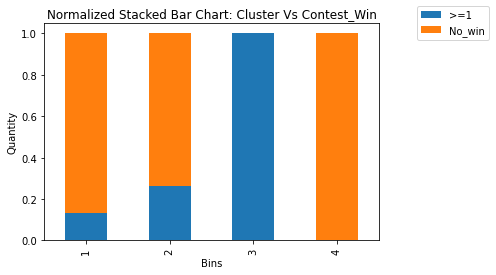

In [27]:
chart=pd.crosstab(x.cluster,x.contest_win_catg)
#normalizing chart and plotting chart
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantity')
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
plt.title('Normalized Stacked Bar Chart: Cluster Vs Contest_Win')

<AxesSubplot:xlabel='cluster'>

Text(0.5, 0, 'Bins')

Text(0, 0.5, 'Quantity')

Text(0.5, 1.0, 'Normalized Stacked Bar Chart: Cluster Vs Productivity Definition')

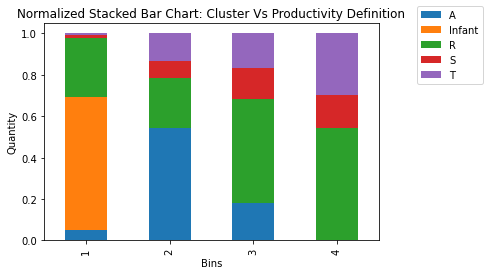

In [28]:
chart=pd.crosstab(x.cluster,x['Productivity Definition'])
## Poductivity is term as STAR rating .. S being the lowest and R being the highest
#normalizing chart and plotting chart
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantity')
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
plt.title('Normalized Stacked Bar Chart: Cluster Vs Productivity Definition')

In [ ]:
## Final Comclusion ::  The 3rd cluster performing the best, getting contest win and high rating, and also staying back for longer time
## so they are less likely to leave.

## 4 cluster is performing well but not getting any contest win even after staying for a long time in orginaztion, so they needs
##to be addressed, otherwise will leave

## 2 cluster is relatively new and not wining conterst, however,it's performance os statifactory. So, it is also to be looked.

## Cluster 1 is mainly newcomers and  needs more time to spend on the company. Having said that, they do have some good performares
## so they also needs to be taken care and rewarded satisfactorily.

In [29]:
# chart=pd.crosstab(x.cluster,x['Final Reason_catg'])
# #normalizing chart and plotting chart
# chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
# plt.xlabel('Bins')
# plt.ylabel('Quantity')
# ax = plt.gca()
# plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
# plt.title('Normalized Stacked Bar Chart: Cluster Vs Final Reason')